In [175]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

from world import World
from utils import  getpolicy, getvalue

plt.rcParams['figure.facecolor']='white'

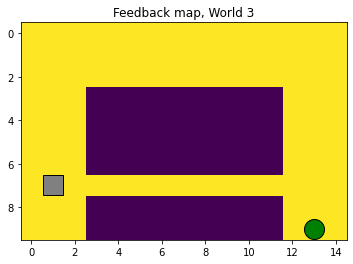

In [176]:
# Initialization
# Initialize the world, Q-table, and hyperparameters
W = World(3)
W.draw()
# initial Q with random value (-1,0)
# the action  for point x,y is Q[x*y+y-1,:]
Q = np.round(np.random.random((4,W.y_size,W.x_size)),4)-1
#learning rate
eta = 0.2
# factor for future reward
gamma = 0.4

In [177]:
start = W.pos

In [178]:
# Training loop
# Train the agent using the Q-learning algorithm.
#[1,2,3,4] ==[down,up,right,left]
# Q(s,a) = (1-eta)*Q(s,a) + eta*[r+gamma*max[Q(s',a')]]
max_try_each_iter = 5000
itertion = 6000
if W.world != 4:
    eps_start = 0.8
    eps_step = 0
else :
    eps_start = 0.8
    eps_step = (1-eps_start)/itertion
    itertion = 12000
for i in range(itertion):
    current_try = 0
    eps = eps_start+eps_step*i
    W.pos = start
    if i % 1000 == 0:
        print('iter {}'.format(i))
    while W.pos!=W.term and current_try<max_try_each_iter:
        valid = 0
        while valid==0:
            current_info = None
            if np.random.rand() >= eps:
                action = np.random.randint(1,5) #here we have 1,2,3,4. 
            else:
                action = np.argmax([Q[0,W.pos[0],W.pos[1]],Q[1,W.pos[0],W.pos[1]],Q[2,W.pos[0],W.pos[1]],Q[3,W.pos[0],W.pos[1]]])+1
            # cur is (action,y,x,Q(s,a))
            current_info = (action,W.pos[0],W.pos[1],Q[action-1,W.pos[0],W.pos[1]])
            # do the action, now the pos has been updated
            valid, feed = W.action(action)
            # if not valid redo action
            if valid == 0:
                W.pos = (current_info[1],current_info[2])
        r = feed
        if W.pos == W.term:
            r=40
        if W.pos == W.term and W.world == 4:
            r=70
        # find the best action for s' state
        best_action = np.argmax([Q[0,W.pos[0],W.pos[1]],Q[1,W.pos[0],W.pos[1]],Q[2,W.pos[0],W.pos[1]],Q[3,W.pos[0],W.pos[1]]])+1
        score = Q[best_action-1,W.pos[0],W.pos[1]]
        Q[current_info[0]-1,current_info[1],current_info[2]] = (1-eta)*current_info[3] + eta*(r+gamma*score)
        current_try += 1
print('last iteration need {} step to reach the term)'.format(current_try))

iter 0
iter 1000
iter 2000
iter 3000
iter 4000
iter 5000
last iteration need 16 step to reach the term)


In [179]:
# W.pos = start
# # change the world here only for plotting
# # otherwise it cannot correctly polt the optimal roate
# if W.world ==4:
#     W.world = 3

# while W.pos!=W.term :
#     action = getpolicy(Q)[W.pos[0],W.pos[1]]
#     W.action(action)
#     W.draw()

In [182]:
#print('total value: {}'.format(value))

np.set_printoptions(suppress=True)
print(np.round(getvalue(Q),3))

[[-0.017 -0.017 -0.017 -0.017 -0.017 -0.017 -0.017 -0.017 -0.017 -0.017
  -0.017 -0.017 -0.017 -0.017 -0.017]
 [-0.017 -0.017 -0.017 -0.017 -0.017 -0.017 -0.017 -0.017 -0.017 -0.017
  -0.017 -0.017 -0.017 -0.017 -0.017]
 [-0.017 -0.017 -0.017 -0.017 -0.018 -0.017 -0.018 -0.017 -0.017 -0.017
  -0.017 -0.017 -0.017 -0.017 -0.017]
 [-0.017 -0.017 -0.017 -0.017 -0.13  -0.162 -0.471 -0.023 -0.458 -0.017
  -0.509 -0.017  0.006 -0.016 -0.017]
 [-0.017 -0.017 -0.017 -0.017 -0.507 -0.568 -0.644 -0.418 -0.591 -0.651
  -0.633 -0.472  0.187  0.879 -0.017]
 [-0.017 -0.017 -0.017 -0.017 -0.506 -0.505 -0.503 -0.496 -0.481 -0.442
  -0.348  0.392  1.005  2.501  0.47 ]
 [-0.017 -0.017 -0.016 -0.016 -0.015 -0.012 -0.006  0.009  0.049  0.147
   0.392  1.005  2.538  6.371  2.134]
 [-0.017 -0.016 -0.016 -0.015 -0.012 -0.006  0.009  0.049  0.147  0.392
   1.005  2.538  6.371 15.953  6.371]
 [-0.017 -0.017 -0.016 -0.016 -0.015 -0.012 -0.006  0.009  0.049  0.319
   2.048  6.371 15.953 39.907 15.953]
 [-0.017 -

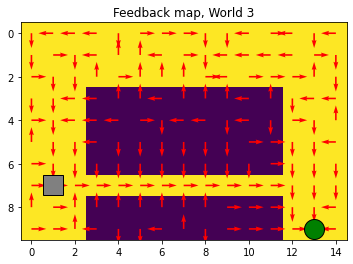

In [181]:
W.pos = start
W.draw(policy = getpolicy(Q))